beta: 14.296228299451194	 beta scale:0.1


<function matplotlib.pyplot.close(fig=None)>

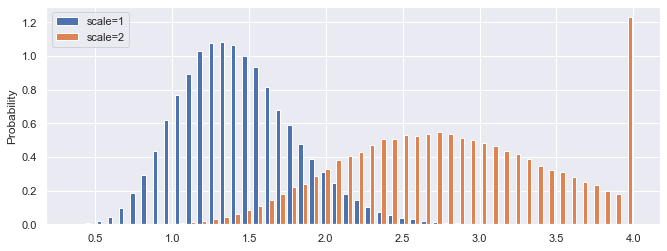

In [2]:
import sys
import numpy as np
import scipy.special as sps
import scipy.stats as st
from tqdm import tqdm_notebook
import pickle
import pandas as pd
import plotly
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import time
import init_common as z
import init_spec_gamma as zz

sns.set(rc={'figure.figsize':(11, 4)})

## Plotting
## 1. Histogram beta ~ gamma dist
# parameters: shape,scale,size
sim_num=10**5
num_bin = 50
beta = zz.beta;
beta_scale = zz.beta_scale
beta_scale2 = beta_scale*2
print("beta: "+str(beta)+"\t beta scale:"+str(beta_scale))

beta_vec1 = np.random.gamma(beta,beta_scale,sim_num)
beta_vec2 = np.random.gamma(beta,beta_scale2,sim_num)
beta_max0 = 4
beta_vec_adj1 = np.where(beta_vec1>beta_max0,beta_max0, beta_vec1)
beta_vec_adj2 = np.where(beta_vec2>beta_max0,beta_max0, beta_vec2)
cnt,bins,ign = plt.hist([beta_vec_adj1,beta_vec_adj2],bins=num_bin,density=True)
#yy1=bins**(beta-1)*(np.exp(-bins/beta_scale)/(sps.gamma(beta)*beta_scale**beta))
#yy2=bins**(beta-1)*(np.exp(-bins/beta_scale2)/(sps.gamma(beta)*beta_scale2**beta))
#plt.plot(bins,yy1,linewidth=2,color='c')
#plt.plot(bins,yy2,linewidth=2,color='r')
plt.legend(['scale=1', 'scale=2'])
plt.ylabel('Probability')
#plt.savefig("./fig/Histogram_betas_0.png")
plt.close

<function matplotlib.pyplot.close(fig=None)>

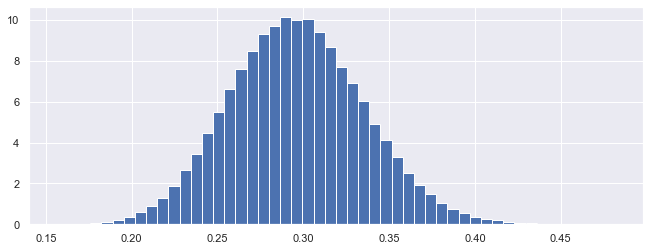

In [3]:
# 2. Histogram: beta~ beta dist. (very narrow)
beta_vec = np.random.beta(40,95,sim_num)
cnt,bins,ign = plt.hist(beta_vec,bins=num_bin,density=True)
#plt.savefig("./fig/Histogram_betas_1.png")
plt.close

R0:=2.2


<function matplotlib.pyplot.close(fig=None)>

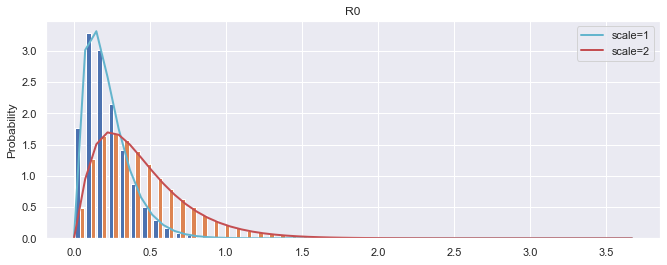

In [4]:
# 3. distribution for R0
# assumption: gamma is a scalar, not a random variable

R0_vec1 = np.random.gamma(z.R0,zz.beta_scale,200000)
R0_vec2 = np.random.gamma(z.R0,beta_scale2,200000)
print("R0:="+str(z.R0))
R0_max = beta_max0/z.gamma
R0_vec1 = np.where(R0_vec1>R0_max, R0_max, R0_vec1)
R0_vec2 = np.where(R0_vec2>R0_max, R0_max, R0_vec2)
cnt,bins,ign=plt.hist([R0_vec1,R0_vec2],bins=50,density=True)
yy1=bins**(z.R0-1)*(np.exp(-bins/beta_scale)/(sps.gamma(z.R0)*beta_scale**z.R0))
yy2=bins**(z.R0-1)*(np.exp(-bins/beta_scale2)/(sps.gamma(z.R0)*beta_scale2**z.R0))
plt.plot(bins,yy1,linewidth=2,color='c')
plt.plot(bins,yy2,linewidth=2,color='r')
plt.ylabel('Probability')
plt.title('R0')
plt.legend(['scale=1','scale=2'])
#plt.savefig("./fig/Histogram_R0.png")
plt.close

mean =	5.0008832544435915(data)	5(theory)
std =	4.4724783074883065(data)	4.47213595499958(theory)
0.7615789356149265
10.895760296767389
Share of people with high recovery time (mild-severe cases): 17.0 %
Mean recovery time for those below that time: 3.87 days
Mean recovery time for those above that time: 15.13 days


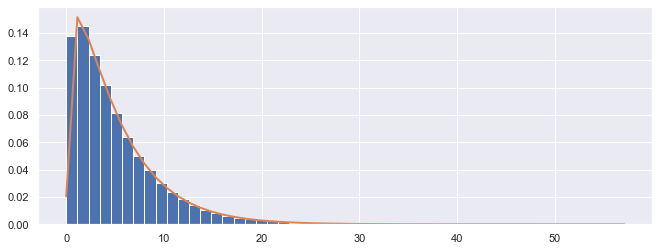

In [5]:
# Recovery time
k=1.25
smean = 5
sm = smean/k
lam = k/smean
# erlang distribution: we generate random samples
gamma_vec = np.random.gamma(k,sm,1000000)
cnt,bins,ign=plt.hist(gamma_vec,bins=50,density=True)
# y_vec=bins**(sm-1)*(np.exp(-bins/k)/(sps.gamma(sm)*k**sm))
z_vec = st.gamma.pdf(bins,k,0,sm)
#u_vec = st.erlang.pdf(bins,k,0,sm)
# z_vec==y_vec
#plt.plot(bins,y_vec,linewidth=2)
plt.plot(bins,z_vec,linewidth=2)
#plt.plot(bins,u_vec,linewidth=2)
print("mean =\t"+str(np.mean(gamma_vec))+"(data)\t"+str(smean)+"(theory)")
print("std =\t"+str(np.std(gamma_vec))+"(data)\t"+str((k*(sm*sm))**.5)+"(theory)")

def func(xx):
    return xx

#alpha = st.gamma.ppf(.,k,0,sm)
#print(alpha)
unknown = 5/6 # no symptoms, no lab tests
cut = 1-unknown
asympt_share = .4
asymp = asympt_share*cut
low_share = unknown+asymp
high_share = 1-low_share
alpha = 1-2*high_share
p_low,p_high=st.gamma.interval(alpha,k,0,sm)
print(p_low)
print(p_high)
print("Share of people with high recovery time (mild-severe cases): "+str(100*np.round(cut,2))+" %")
avg_rec_0=st.gamma.expect(func,args=(k,),loc=0,scale=sm,lb=None,ub=p_high,conditional=True)
print("Mean recovery time for those below that time: "+str(np.round(avg_rec_0,2))+" days")
avg_rec_1=st.gamma.expect(func,args=(k,),loc=0,scale=sm,lb=p_high,ub=None,conditional=True)
print("Mean recovery time for those above that time: "+str(np.round(avg_rec_1,2))+" days")


2.7456760419004853
10.161785608286865
Share of people with high recovery time (mild-severe cases): 17.0 %
Mean recovery time for those below that time: 5.08 days
Mean recovery time for those above that time: 13.62 days


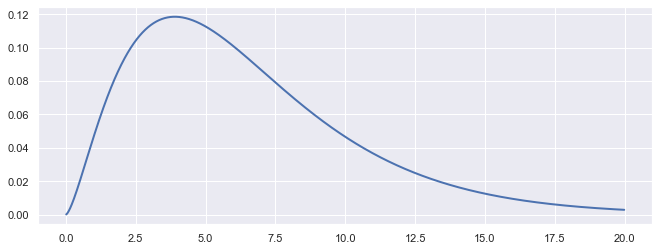

In [11]:
# serial interval distribution with mean of 6.5 days and variance 0.62
m = 6.5
s = 0.62
m0 = m*(s**2)
s0 = 1/(s**2)
x=np.arange(0.01,20,0.01)
y = st.gamma.pdf(x,m0,0,s0)
plt.plot(x,y,linewidth=2)

def func(xx):
    return xx

#alpha = st.gamma.ppf(.,k,0,sm)
#print(alpha)
unknown = 5/6 # no symptoms, no lab tests
cut = 1-unknown
asympt_share = .4
asymp = asympt_share*cut
low_share = unknown+0*asymp
high_share = 1-low_share
alpha = 1-2*high_share
p_low,p_high=st.gamma.interval(alpha,m0,0,s0)
print(p_low)
print(p_high)
print("Share of people with high recovery time (mild-severe cases): "+str(100*np.round(cut,2))+" %")
avg_rec_0=st.gamma.expect(func,args=(m0,),loc=0,scale=s0,lb=None,ub=p_high,conditional=True)
print("Mean recovery time for those below that time: "+str(np.round(avg_rec_0,2))+" days")
avg_rec_1=st.gamma.expect(func,args=(m0,),loc=0,scale=s0,lb=p_high,ub=None,conditional=True)
print("Mean recovery time for those above that time: "+str(np.round(avg_rec_1,2))+" days")



mean recovery time = 6.501 days
R0 = 2.2


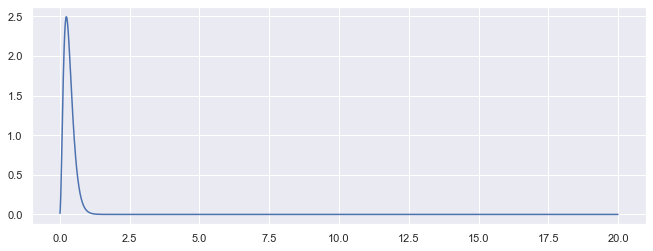

In [7]:
Trec_vec = np.random.gamma(m0,s0,10000000)
#cnt,bins,ign=plt.hist(1/Trec_vec,bins=50,density=True)

Trec_mean = np.average(Trec_vec)
print("mean recovery time = "+str(np.round(Trec_mean,3))+" days")
R0 = 2.2
print("R0 = "+str(R0))
beta_mean = R0/Trec_mean
beta_scale = 0.1
bm0 = beta_mean/(beta_scale)
bs0 = (beta_scale)
x=np.arange(0.01,20,0.01)
y = st.gamma.pdf(x,bm0,0,bs0)
plt.plot(x,y)

(0.9309152642857998, 0.006423240245187861, 2.3742048499925925)


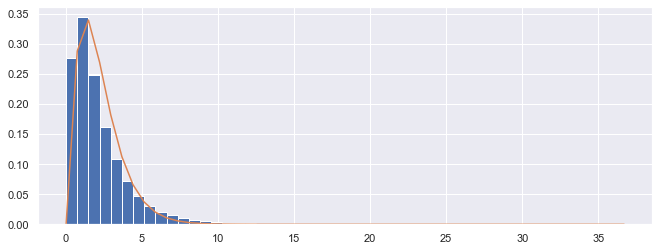

In [9]:
N=100000
rec_vec = np.random.gamma(m0,s0,N)
beta_vec = np.random.gamma(bm0,bs0,N)
R0_vec=rec_vec*beta_vec
R0_max = 12
#print(params)
R0_vec = R0_vec[np.where(R0_vec!=R0_max)]
cnt,bins,ign=plt.hist(R0_vec,bins=50,density=True)

params=st.gamma.fit(R0_vec)
plt.plot(bins,st.gamma.pdf(bins,params[2],params[1],params[0]))
print(params)